In [47]:
import pandas as pd
import numpy as np
import os

### Load Data From Google Colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/traffic_flow_dataset.csv")

In [6]:
df.head()

speed  speedUncapped   freeFlow  jamFactor  temperature  humidity  \
0   6.663553       6.663553  11.456153   4.538117        28.84      82.0   
1   8.611112       8.611112  14.194557   2.977912        28.84      82.0   
2   6.944445       6.944445   7.777778   0.000000        28.79      81.0   
3   6.111111       6.111111   7.777778   0.900000        28.73      81.0   
4  13.333334      13.333334  11.111112   0.000000        28.73      81.0   

   pressure  visibility  wind_speed  wind_degree  wind_gust  clouds  rain_3h  \
0    1011.0     10000.0        3.09        160.0        0.0    75.0      0.0   
1    1011.0     10000.0        3.09        160.0        0.0    75.0      0.0   
2    1011.0     10000.0        3.09        160.0        0.0    75.0      0.0   
3    1011.0     10000.0        3.09        160.0        0.0    75.0      0.0   
4    1011.0     10000.0        3.09        160.0        0.0    75.0      0.0   

          timestamp  road_id  
0  2023-08-01 22:50        1  
1  2023-08-01 22:50        5  
2  2023-08-01 22:50        3  
3  2023-08-01 22:50       19  
4  2023-08-01 22:50       24

### Alternatively, We can load the data from BigQuery

In [7]:
from google.cloud import bigquery

In [8]:
service_account_info = {
  "type": os.environ.get("type"),
  "project_id": os.environ.get("project_id"),
  "private_key_id": os.environ.get("private_key_id"),
  "private_key": os.environ.get("private_key"),
  "client_email": os.environ.get("client_email"),
  "client_id": os.environ.get("client_id"),
  "auth_uri": os.environ.get("auth_uri"),
  "token_uri": os.environ.get("token_uri"),
  "auth_provider_x509_cert_url": os.environ.get("auth_provider_x509_cert_url"),
  "client_x509_cert_url": os.environ.get("client_x509_cert_url"),
  "universe_domain": os.environ.get("universe_domain")
}

In [9]:
client = bigquery.Client.from_service_account_info(service_account_info)

In [10]:
sql_query = """
        SELECT *
        FROM
            `disco-math-385807.traffooze.traffic_flow_data`
    """

In [11]:
query_job = client.query(sql_query)

In [31]:
df = query_job.to_dataframe()

In [32]:
df.head()

road_id           timestamp      speed  speedUncapped   freeFlow  \
0     1092 2023-08-08 06:25:00  10.552414      10.552414   9.996858   
1     1093 2023-08-08 06:25:00   9.246962       9.246962   9.246962   
2     1094 2023-08-08 06:25:00   7.718518       7.718518   8.014815   
3     1099 2023-08-08 06:25:00  13.888889      13.888889  14.444445   
4     1100 2023-08-08 06:25:00  15.277779      16.111110  14.166667   

   jamFactor  temperature  humidity  pressure  visibility  wind_speed  \
0   0.000000        27.95      84.0    1010.0     10000.0        3.58   
1   0.085547        27.93      85.0    1010.0     10000.0        3.09   
2   0.155733        27.93      85.0    1010.0     10000.0        3.09   
3   0.200000        27.93      86.0    1011.0     10000.0        2.57   
4   0.000000        27.93      86.0    1011.0     10000.0        2.57   

   wind_degree  wind_gust  clouds  rain_3h  
0        120.0        0.0    75.0      0.0  
1        130.0        0.0    75.0      0.0  
2        130.0        0.0    75.0      0.0  
3         90.0        0.0    75.0      0.0  
4         90.0        0.0    75.0      0.0

### Correlation

In [33]:
df.corr()

<ipython-input-33-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


road_id     speed  speedUncapped  freeFlow  jamFactor  \
road_id        1.000000  0.017852       0.013559  0.010543  -0.028889   
speed          0.017852  1.000000       0.990527  0.879897  -0.479289   
speedUncapped  0.013559  0.990527       1.000000  0.867479  -0.480738   
freeFlow       0.010543  0.879897       0.867479  1.000000  -0.080673   
jamFactor     -0.028889 -0.479289      -0.480738 -0.080673   1.000000   
temperature    0.004867 -0.148057      -0.144046 -0.000414   0.312314   
humidity       0.001275  0.123629       0.119810 -0.000657  -0.259305   
pressure      -0.001363  0.019020       0.021202  0.003004  -0.030310   
visibility    -0.000008  0.036433       0.036363 -0.000007  -0.082134   
wind_speed     0.001246 -0.154955      -0.151358 -0.009560   0.315093   
wind_degree    0.000735 -0.061091      -0.056573 -0.004543   0.133959   
wind_gust           NaN       NaN            NaN       NaN        NaN   
clouds         0.003878 -0.018670      -0.020701 -0.023332  -0.003789   
rain_3h             NaN       NaN            NaN       NaN        NaN   

               temperature  humidity  pressure  visibility  wind_speed  \
road_id           0.004867  0.001275 -0.001363   -0.000008    0.001246   
speed            -0.148057  0.123629  0.019020    0.036433   -0.154955   
speedUncapped    -0.144046  0.119810  0.021202    0.036363   -0.151358   
freeFlow         -0.000414 -0.000657  0.003004   -0.000007   -0.009560   
jamFactor         0.312314 -0.259305 -0.030310   -0.082134    0.315093   
temperature       1.000000 -0.957968 -0.223856   -0.018068    0.739169   
humidity         -0.957968  1.000000  0.194931   -0.077788   -0.678904   
pressure         -0.223856  0.194931  1.000000   -0.055171   -0.201597   
visibility       -0.018068 -0.077788 -0.055171    1.000000   -0.089524   
wind_speed        0.739169 -0.678904 -0.201597   -0.089524    1.000000   
wind_degree       0.229369 -0.207489 -0.068401    0.005539    0.331794   
wind_gust              NaN       NaN       NaN         NaN         NaN   
clouds           -0.126307  0.099801  0.075809    0.144073   -0.089011   
rain_3h                NaN       NaN       NaN         NaN         NaN   

               wind_degree  wind_gust    clouds  rain_3h  
road_id           0.000735        NaN  0.003878      NaN  
speed            -0.061091        NaN -0.018670      NaN  
speedUncapped    -0.056573        NaN -0.020701      NaN  
freeFlow         -0.004543        NaN -0.023332      NaN  
jamFactor         0.133959        NaN -0.003789      NaN  
temperature       0.229369        NaN -0.126307      NaN  
humidity         -0.207489        NaN  0.099801      NaN  
pressure         -0.068401        NaN  0.075809      NaN  
visibility        0.005539        NaN  0.144073      NaN  
wind_speed        0.331794        NaN -0.089011      NaN  
wind_degree       1.000000        NaN  0.035866      NaN  
wind_gust              NaN        NaN       NaN      NaN  
clouds            0.035866        NaN  1.000000      NaN  
rain_3h                NaN        NaN       NaN      NaN

###Visualizations

In [15]:
import matplotlib.pyplot as plt

In [34]:
road = df.loc[df["road_id"]==1000]

In [ ]:
road['timestamp'] = pd.to_datetime(road['timestamp'])

In [ ]:
road['time_formatted'] = road['timestamp'].dt.strftime('%H-%M')

In [43]:
target_date = "2023-08-08"  # Replace with your desired date

# Filter data for the specified date
data_for_one_day = road[road["timestamp"].dt.date == pd.to_datetime(target_date).date()]

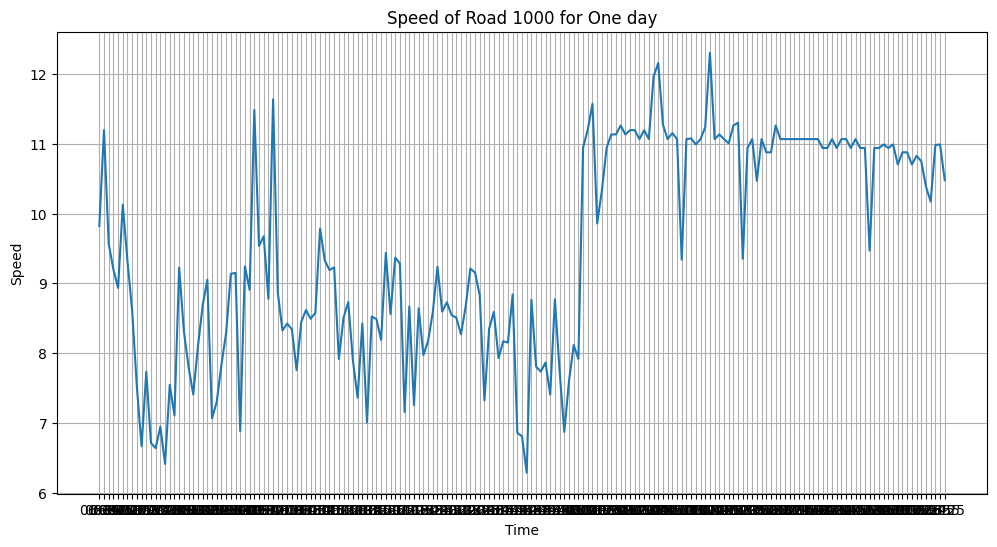

In [44]:
fig = plt.figure(figsize=(12, 6))
plt.plot(data_for_one_day['time_formatted'].values, data_for_one_day['speed'].values)
plt.xlabel('Time')
plt.ylabel('Speed')
plt.grid(True)
plt.title('Speed of Road 1000 for One day')
plt.show()

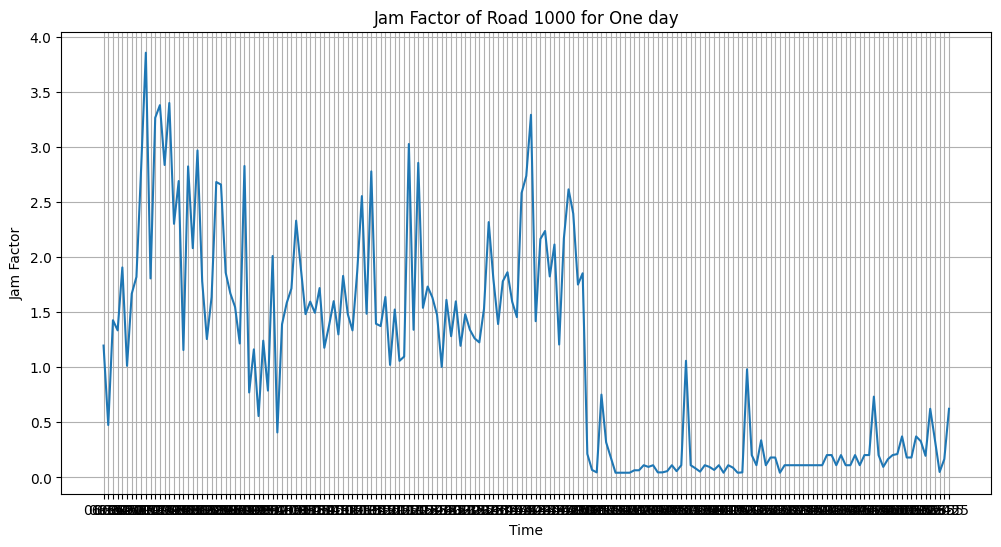

In [46]:
fig = plt.figure(figsize=(12, 6))
plt.plot(data_for_one_day['time_formatted'].values, data_for_one_day['jamFactor'].values)
plt.xlabel('Time')
plt.ylabel('Jam Factor')
plt.grid(True)
plt.title('Jam Factor of Road 1000 for One day')
plt.show()

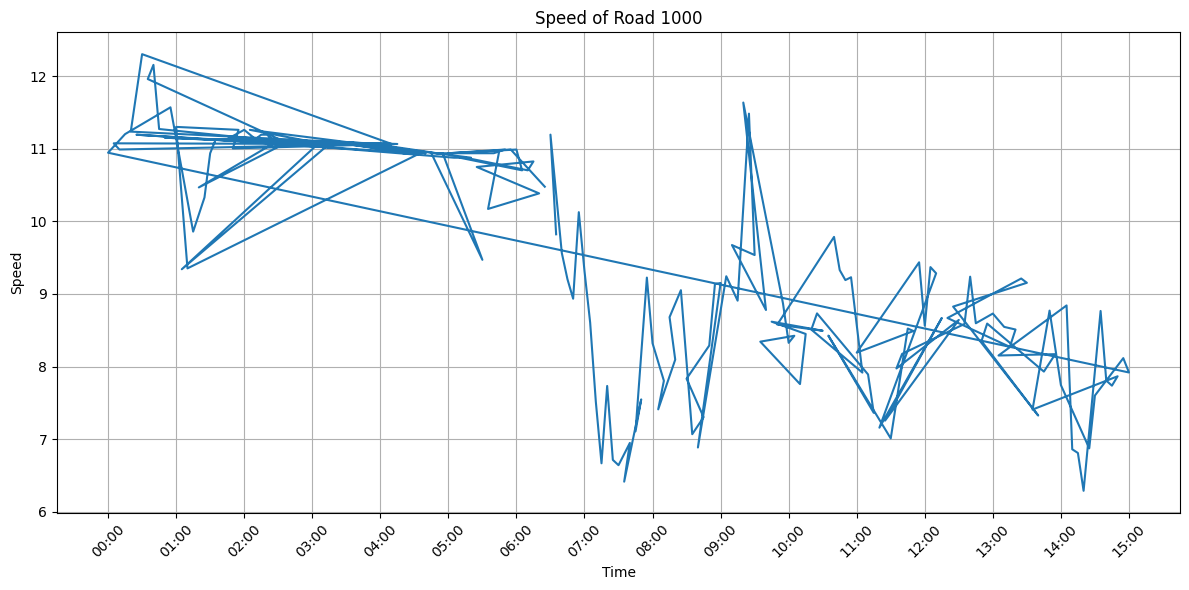

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data_for_one_day['timestamp'], data_for_one_day['speed'])
ax.set_xlabel('Time')
ax.set_ylabel('Speed')
ax.grid(True)
ax.set_title('Speed of Road 1000')

# Format the x-axis tick labels
ax.xaxis.set_major_locator(mdates.HourLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()